<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/TIC_256364928_Vet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [4]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
# lc_0.csv is made for slected sectors or specifically made for this one
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error).bin(time_bin_size=0.004)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 256364928
period = 2.21868634358917  # Orbital period in days
epoch = 2422.10871589716
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.15]
folded_lc = folded_lc[folded_lc.time > -0.15]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_256364928_all_sector_lightcurve.csv


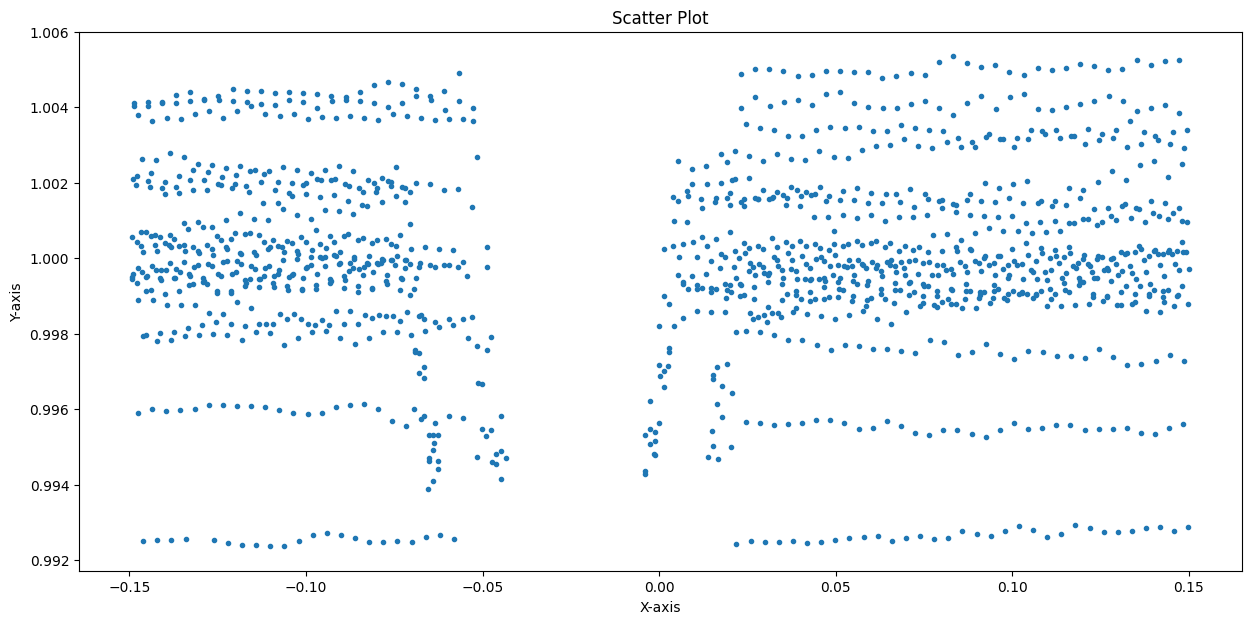

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [24]:
ID = tic_id
sectors = np.array([41, 54])
target = tr.target(ID=ID, sectors=sectors, search_radius=7) # target radius shorted

<ipython-input-25-b55bebbefaa5>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_41, ap_54])


Sector 41


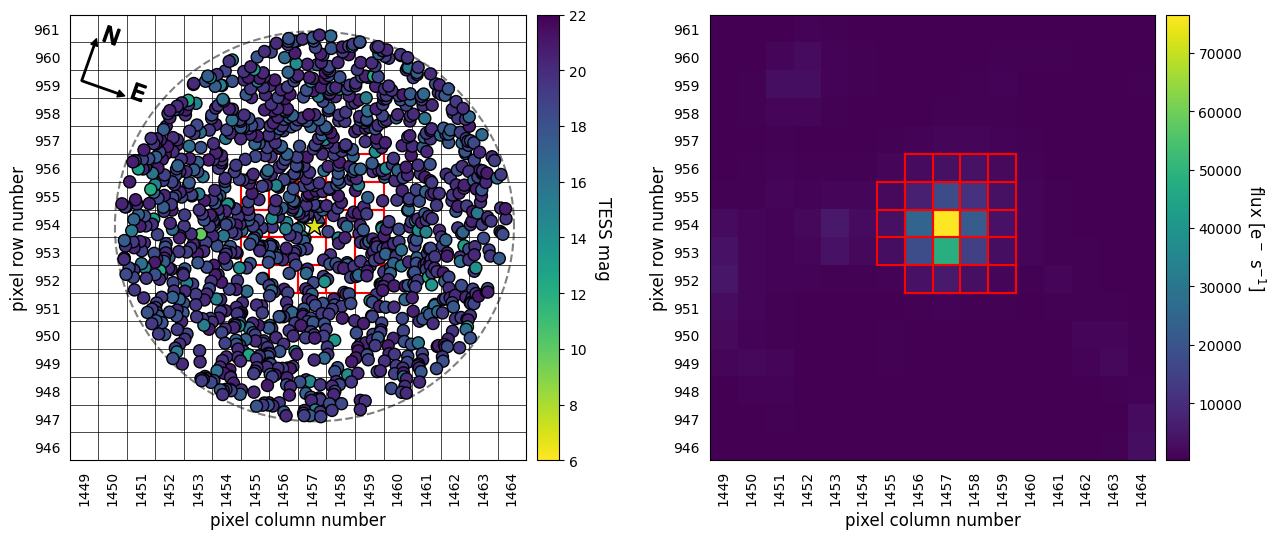

Sector 54


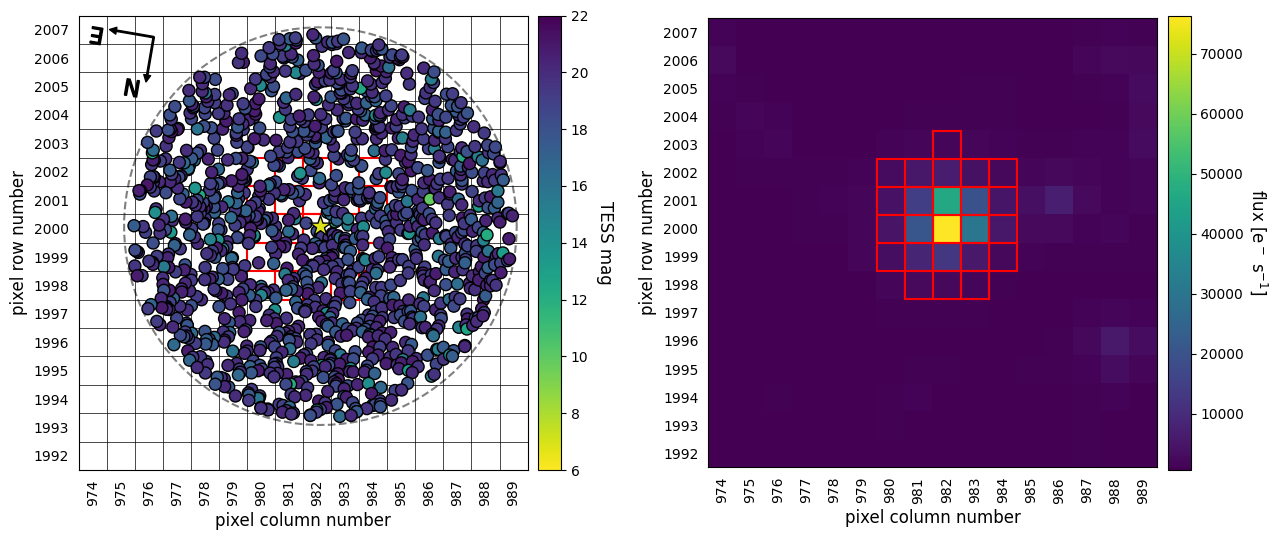

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,256364928,6.8481,6.073,5.587,5.541,300.182138,22.710853,0.84,0.776484,5023.0,50.568500,0.000,0.000
1,1945778382,17.9656,NaN,NaN,NaN,300.182657,22.712026,NaN,NaN,NaN,0.933769,4.560,22.202
2,1945778365,19.1534,NaN,NaN,NaN,300.181401,22.712961,NaN,NaN,NaN,1.007590,7.974,342.122
3,1945778378,15.1755,NaN,NaN,NaN,300.179276,22.711992,1.04,1.984340,5790.0,0.430674,10.350,293.336
4,1945778379,19.5853,NaN,NaN,NaN,300.179829,22.712930,NaN,NaN,NaN,-0.169818,10.710,314.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1945777245,20.0390,NaN,NaN,NaN,300.213964,22.684747,NaN,NaN,NaN,1.269390,141.441,131.635
1229,1948606869,20.1138,NaN,NaN,NaN,300.168518,22.748098,NaN,NaN,NaN,2.205130,141.503,341.364
1230,1945778551,20.6681,NaN,NaN,NaN,300.139518,22.711244,NaN,NaN,NaN,NaN,141.540,270.577
1231,1945778275,20.3998,NaN,NaN,NaN,300.140466,22.702410,NaN,NaN,NaN,NaN,141.690,257.620


In [25]:
ap_41 = np.array([[1455.0, 953.0], [1455.0, 954.0], [1455.0, 955.0], [1456.0, 952.0],
      [1456.0, 953.0], [1456.0, 954.0], [1456.0, 955.0], [1456.0, 956.0], [1457.0,
        952.0], [1457.0, 953.0], [1457.0, 954.0], [1457.0, 955.0], [1457.0, 956.0],
      [1458.0, 952.0], [1458.0, 953.0], [1458.0, 954.0], [1458.0, 955.0], [1458.0,
        956.0], [1459.0, 952.0], [1459.0, 953.0], [1459.0, 954.0], [1459.0, 955.0],
      [1459.0, 956.0]])
ap_54 = np.array([[980.0, 1999.0], [980.0, 2000.0], [980.0, 2001.0], [
        980.0, 2002.0], [981.0, 1998.0], [981.0, 1999.0], [981.0, 2000.0], [981.0,
        2001.0], [981.0, 2002.0], [982.0, 1998.0], [982.0, 1999.0], [982.0, 2000.0],
      [982.0, 2001.0], [982.0, 2002.0], [982.0, 2003.0], [983.0, 1998.0], [983.0,
        1999.0], [983.0, 2000.0], [983.0, 2001.0], [983.0, 2002.0], [984.0, 1999.0],
      [984.0, 2000.0], [984.0, 2001.0], [984.0, 2002.0]])

apertures = np.array([ap_41, ap_54])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [29]:
target.calc_depths(tdepth=1.707, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,256364928,6.8481,6.073,5.587,5.541,300.182138,22.710853,0.84,0.776484,5023.0,50.568500,0.000,0.000,9.757167e-01,0.0
1,1945778382,17.9656,NaN,NaN,NaN,300.182657,22.712026,NaN,NaN,NaN,0.933769,4.560,22.202,3.484764e-05,0.0
2,1945778365,19.1534,NaN,NaN,NaN,300.181401,22.712961,NaN,NaN,NaN,1.007590,7.974,342.122,1.165069e-05,0.0
3,1945778378,15.1755,NaN,NaN,NaN,300.179276,22.711992,1.04,1.984340,5790.0,0.430674,10.350,293.336,4.530726e-04,0.0
4,1945778379,19.5853,NaN,NaN,NaN,300.179829,22.712930,NaN,NaN,NaN,-0.169818,10.710,314.279,7.803935e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1945777245,20.0390,NaN,NaN,NaN,300.213964,22.684747,NaN,NaN,NaN,1.269390,141.441,131.635,2.959804e-12,0.0
1229,1948606869,20.1138,NaN,NaN,NaN,300.168518,22.748098,NaN,NaN,NaN,2.205130,141.503,341.364,5.936616e-14,0.0
1230,1945778551,20.6681,NaN,NaN,NaN,300.139518,22.711244,NaN,NaN,NaN,NaN,141.540,270.577,5.707586e-14,0.0
1231,1945778275,20.3998,NaN,NaN,NaN,300.140466,22.702410,NaN,NaN,NaN,NaN,141.690,257.620,2.329289e-14,0.0


In [31]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

CPU times: user 35.2 ms, sys: 4 ms, total: 39.2 ms
Wall time: 38.3 ms


In [32]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.75
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
1,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
2,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
3,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
4,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
5,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
6,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
7,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
8,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
9,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333


In [33]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

ValueError: ignored

<Figure size 1200x0 with 0 Axes>

In [ ]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

Our final conclusion about this specified planet of TIC 256364928 is that it is a invalid transit (according to the range of FPP and NFPP set by TRICERATOPS).